In [1]:
from gensim.models import Word2Vec

### Loading the Corpus

In [3]:
sentences = [
    ['human', 'interface', 'computer'],
    ['survey', 'user', 'computer', 'system', 'response', 'time'],
    ['eps', 'user', 'interface', 'system'],
    ['system', 'human', 'system', 'eps'],
    ['user', 'response', 'time'],
    ['trees'],
    ['graph', 'trees'],
    ['graph', 'minors', 'trees'],
    ['graph', 'minors', 'survey'],
    ['algorithm', 'graph', 'trees'],
    ['data', 'system', 'time', 'response'],
    ['network', 'interface', 'connection'],
    ['human', 'learning', 'system'],
    ['survey', 'data', 'analysis'],
    ['computer', 'user', 'interaction'],
    ['trees', 'structure', 'graph'],
    ['minors', 'graph', 'algorithm'],
    ['response', 'user', 'system'],
    ['interface', 'design', 'survey'],
    ['time', 'complexity', 'algorithm']
]


### Training the Word2vec

In [9]:
model = Word2Vec(sentences=sentences,vector_size=10,min_count=1)

In [11]:
print(model.wv['trees'])

[-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]


### Checking the Similaritites.


In [12]:
model.wv.similarity('graph','algorithm')

0.35867858

In [ ]:
model.wv.most_similar('computer', topn = 10)

#### Now we need to decrease the dimensions to work on efficiently on the data.<br> <br>we will be using the PCA with components on xy plane for further anaylsis.

In [27]:
vectors=[model.wv[word]for word in model.wv.index_to_key]

In [28]:
vectors[2]

array([ 0.07313498,  0.05069767,  0.06756324,  0.00761148,  0.06352147,
       -0.03403806, -0.00943897,  0.05770648, -0.07521467, -0.03935859],
      dtype=float32)

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [30]:
final_vec = pca.fit_transform(vectors)

### Plotting the things

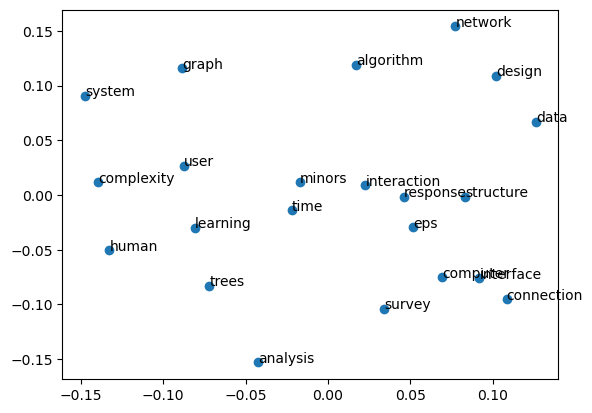

In [41]:
import matplotlib.pyplot as plt
plt.scatter(final_vec[:,0], final_vec[:,1])
words = model.wv.index_to_key
for i, word in enumerate(words):
  plt.annotate(word, xy = (final_vec[i][0], final_vec[i][1]))
plt.show()


In [39]:
words= model.wv.index_to_key
len(words)

22

In [40]:
for i, word in enumerate(words):
    print(i , word)
    

0 system
1 graph
2 user
3 trees
4 interface
5 survey
6 response
7 time
8 minors
9 computer
10 human
11 algorithm
12 eps
13 data
14 design
15 network
16 connection
17 learning
18 analysis
19 interaction
20 structure
21 complexity


### Loading the large data.

In [48]:
import gensim.downloader as api
api.info()['models'].keys()
api.info()['corpora'].keys()

dict_keys(['semeval-2016-2017-task3-subtaskBC', 'semeval-2016-2017-task3-subtaskA-unannotated', 'patent-2017', 'quora-duplicate-questions', 'wiki-english-20171001', 'text8', 'fake-news', '20-newsgroups', '__testing_matrix-synopsis', '__testing_multipart-matrix-synopsis'])

In [55]:
corpora=api.load('text8')
type(corpora)

text8.Dataset

In [50]:
corpus=[word for word in corpora]

In [52]:
len(corpus)

1701

In [57]:
cor_formed=''
for corp in corpus:
    cor_formed+=' '.join(corp)

print('Corpus Size : ' , len(cor_formed.split(' ')))
print('Vocab Size  : ' , len(set(cor_formed.split(' '))))

Corpus Size :  17003507
Vocab Size  :  255310


In [60]:
del corpus
model = Word2Vec( corpus, min_count = 5, vector_size = 300, window = 3, sg = 0, epochs = 5)

NameError: name 'corpus' is not defined

In [63]:
model.wv.most_similar('first', topn = 5)

[('second', 0.5876520276069641),
 ('last', 0.5812421441078186),
 ('fourth', 0.5640148520469666),
 ('third', 0.5376700758934021),
 ('fifth', 0.4938567876815796)]

In [64]:
model.wv.most_similar('car', topn = 5)

[('driver', 0.7229208946228027),
 ('cars', 0.7142030596733093),
 ('motorcycle', 0.6686744093894958),
 ('taxi', 0.6661785244941711),
 ('truck', 0.6225689649581909)]

In [69]:
import numpy as np
np.shape(model.wv['car'])

(300,)

In [70]:
model.wv.similarity('good','bad')

0.74060977

### Working on the Dimensions

In [71]:
from sklearn.decomposition import PCA


In [74]:
X=[model.wv[word]for word in model.wv.index_to_key]
words= list(model.wv.index_to_key)

print('Dimensions of each Vector | Before : ', len(X[0]))

pca=PCA(n_components=2)
Y=pca.fit_transform(X)

print('Dimensions of each Vector | Before : ', len(Y[0]))

Dimensions of each Vector | Before :  300
Dimensions of each Vector | Before :  2
